# Assignment 2


**Due date:** Wednesday 20th September, 23:59

**Computer info:** MacBook Air, Chip: Apple M1, Ram: 8GB, macOs 13.4.1, 2020

<div class="alert alert-warning">
<strong>Instructions for Cell Execution:</strong>

1. Execute the cell under "Used Libraries as first".
2. Run the cells in the order they appear.
3. There is an Extra part (that you can safely skip), where I've made some experiments.
</div>

---
### Used Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

#change palette
import seaborn as sns
from matplotlib import colors
sns.set(rc={"axes.facecolor":"#FAEBD7" , "figure.facecolor":"#FFEFDB"})

---
---
---
---
## Exercise 1


<div class="alert alert-info">
<strong>Instructions for Exercise Reading:</strong>
    
The following section will be organized as follows: for each point, you will first see the required function, followed by a test, and finally, the required comments.
</div>

The first function is common to each part and is used to visualize an $(x, y)$ plot and the corresponding circle.

In [2]:
def plot_uniform_circle(x, y, radius=1.0, markers_size=2, alpha=0.7, title=None):
    """
    Plot an (x, y)-distribution and the required circle.

    Args:
        x, y (array): Coordinates.
        radius (float, optional): Radius of the circle. Default is 1.0.
        markers_size (int, optional): Marker size for scatter plot. Default is 2.
        alpha (float, optional): Alpha blending value for scatter plot. Default is 0.7.
        title (string, optional): Plot title.

    Returns:
        None
    """
    # Create a figure and axis
    plt.figure(figsize=(6, 6))
    ax = plt.gca()

    # Scatter plot for (x, y) distribution
    plt.scatter(x, y, s=markers_size, alpha=alpha, color='#8B2323')

    # Adjust the plot limits
    plt.xlim(-1.01, 1.01)
    plt.ylim(-1.01, 1.01)

    # Set axis labels
    plt.xlabel("x")
    plt.ylabel("y")

    # Set plot title with the number of samples
    if title:
        num_samples = len(x)
        plt.title(f"{title}\nSample Size: {num_samples}", fontsize=14)

    # Draw the circle
    circle = plt.Circle((0, 0), radius, color='#104E8B', fill=False, linestyle='--', linewidth=2)
    ax.add_patch(circle)

    plt.grid(False)
    # Show the plot
    plt.show()

---
---
### Point a

In [3]:
def generate_uniform_circle_points_a(radius=1.0, num_points=2000):
    """
    Generate points with a uniform distribution inside a circle using the rejection method.

    Args:
        radius (float, optional): Radius of the circle. Default is 1.0.
        num_points (int, optional): Number of points to generate. Default is 2000.

    Returns:
        Tuple: Two NumPy arrays containing the x and y coordinates of the generated points.
    """
    accepted_x = []
    accepted_y = []

    # Generate points until the desired number of points is reached
    while len(accepted_x) < num_points:
        # Generate random points within a square that envelops the circle
        x = np.random.uniform(-radius, radius)
        y = np.random.uniform(-radius, radius)

        # Check if the point is inside the circle using the equation of a circle
        if x**2 + y**2 <= radius**2:
            accepted_x.append(x)
            accepted_y.append(y)

    # Convert the lists of accepted points into NumPy arrays
    x_points = np.array(accepted_x)
    y_points = np.array(accepted_y)

    return x_points, y_points

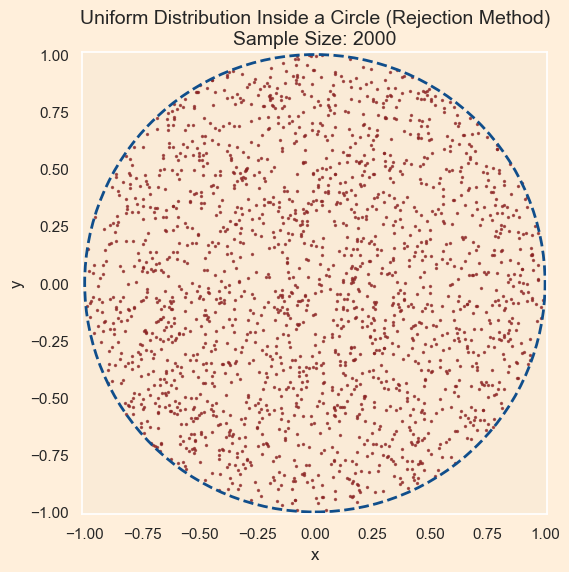

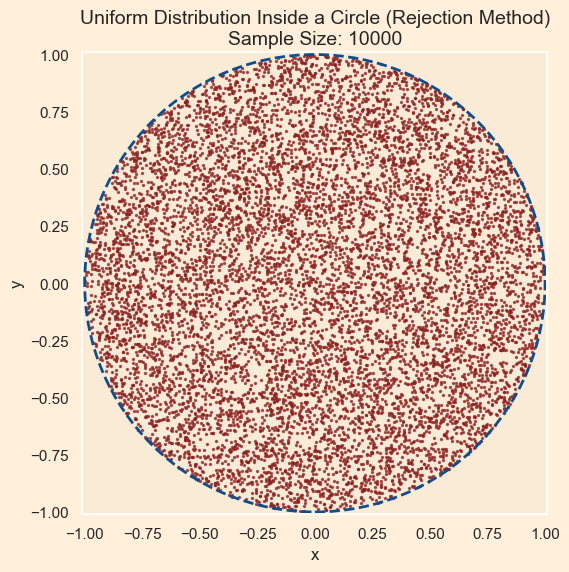

In [4]:
#testing: (i've also tried to use more points)

dimensions=[2000,10000]

for i in dimensions:
    
    (x_a,y_a)=generate_uniform_circle_points_a(num_points=i)
    
    plot_uniform_circle(x_a,y_a,title='Uniform Distribution Inside a Circle (Rejection Method)')

---
---
### Point b

In [5]:
def generate_uniform_circle_points_b(radius=1.0, num_points=2000):
    """
    Generate points with a uniform distribution inside a circle using polar coordinates.

    Args:
        radius (float, optional): Radius of the circle. Default is 1.0.
        num_points (int, optional): Number of points to generate. Default is 2000.

    Returns:
        Tuple: Two NumPy arrays containing the x and y coordinates of the generated points.
    """

    # Generate random values for r and theta
    r_values = np.random.uniform(0, radius, num_points)
    theta_values = np.random.uniform(0, 1, num_points) * 2 * math.pi  # Scale theta to cover the full circle

    # Calculate (x, y) coordinates using polar coordinates
    x_points = r_values * np.cos(theta_values)
    y_points = r_values * np.sin(theta_values)

    return x_points, y_points

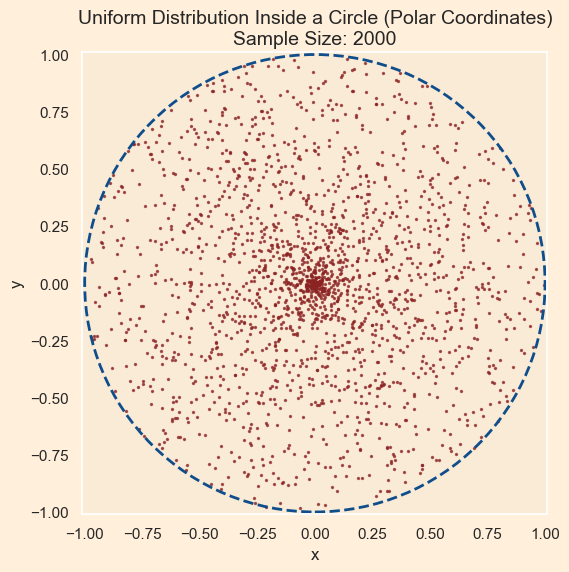

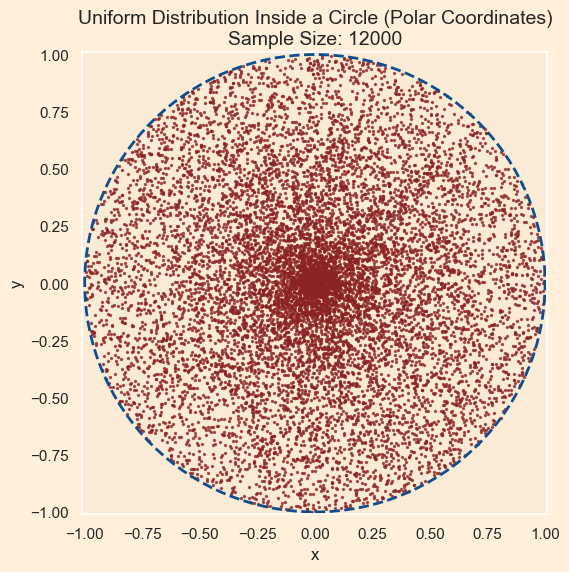

In [6]:
#testing: (i've also tried to use more points)

dimensions=[2000,12000]

for i in dimensions:
    
    (x_b,y_b)=generate_uniform_circle_points_b(num_points=i)

    plot_uniform_circle(x_b,y_b,title='Uniform Distribution Inside a Circle (Polar Coordinates)')

**Observation**

The first method ('a') generates points uniformly distributed within the circle. The second method ('b') allows us to generate random points highly concentrated near the center of the circle, as we can observe from the plots.

In the rejection method ('a'), despite the limitation of accepting or rejecting values at each step, it enables the creation of a uniform distribution within the circle.

In the method using polar coordinates ('b'), random values of 'r' are generated from a uniform distribution in the interval $[0,1]$, and random values of 'theta' are generated from a uniform distribution in the interval $[0,2\pi]$. As a result, the distribution is no longer uniform. In fact let be $A=\{(u,v)|u^2+v^2\leq 1/4\}$(circle of radus 0,.5), it is obvious that if $(x,y)$ folow an uniform distribution, we should have $\mathbb{P}\{(x,y)\in A\}=|A|=1/4$. Instead with this method, we have that:

   $$\mathbb{P}\{(x,y)\in A\}=\mathbb{P}\{x^2+y^2\leq 1/4\}=\mathbb{P}\{r\leq 1/2\}\underbrace{=}_{r\sim U(0,1)}=1/2\text{.}$$
As a result, the obtained distribution is not unform.

However, this rough argument emphasizes that the distance from the center is not generated uniformly.

---
**Extra part (safely skip)**

To maintain consistency, I conducted a test to calculate the probabilities of obtaining values inside a circle with a radius of 0.5. This was achieved using the `count_probabilities_in_circular_ring` function defined at the beginning. Essentially, we conducted multiple simulations by varying the number of points with this function to obtain an average probability of getting points inside a circle with a radius of 0.5. If distribution is uniform(by the plot obviously is not uniform), we shoul have probability of $0.25$(measure of choosen ring/measure of the circle).

In [7]:
#These functions, defined, allow to evaluate the probability of getting a point inside a circular ring
#        with an inner radius and an outer radius. It will be used to compare point 'a' and point 'b'.
def count_points_in_circular_ring(c, y, lower_bound=0, upper_bound=0.5):
    """
    Count the number of points falling inside a closed circular ring
    defined by upper and lower radii.

    Args:
        c (array): Array of x-coordinates of the points.
        y (array): Array of y-coordinates of the points.
        lower_bound (float, optional): Lower radius of the circular ring. Default is 0.
        upper_bound (float, optional): Upper radius of the circular ring. Default is 0.5.

    Returns:
        int: Number of points falling inside the circular ring.
    """
    # Calculate the distances of the points from the origin (0, 0)
    distances = np.sqrt(c**2 + y**2)
    
    # Count the points that are inside the circular ring
    count = np.sum((distances >= lower_bound) & (distances <= upper_bound))
    
    return count

def count_probabilities_in_circular_ring(x_points, y_points, lower_bound=0, upper_bound=0.5):
    """
    Calculate the probability that points fall inside a closed circular ring
    defined by upper and lower radii.

    Args:
        x_points (array): Array of x-coordinates of the points.
        y_points (array): Array of y-coordinates of the points.
        lower_bound (float, optional): Lower radius of the circular ring. Default is 0.
        upper_bound (float, optional): Upper radius of the circular ring. Default is 0.5.

    Returns:
        float: Probability that the points fall inside the circular ring.
    """
    # Count the points inside the circular ring
    count_inside = count_points_in_circular_ring(x_points, y_points, lower_bound, upper_bound)
    
    # Calculate the probability
    probability = count_inside / len(x_points)
    
    return probability

In [8]:
# Define an array of dimensions (number of points) to test
dimensions = np.arange(1, 20) * 5000

# Initialize an empty list to store probabilities
prob = []

# Loop through each dimension (number of points)
for i in range(len(dimensions)):
    
    x, y = generate_uniform_circle_points_b(num_points=dimensions[i])
    
    # Calculate the probability of points falling inside a circular ring
    probability = count_probabilities_in_circular_ring(x, y)
    
    # Append the probability to the list
    prob.append(probability)

# Print the probabilities for each dimension
print('Probabilities:', [round(p, 3) for p in prob])# Truncate the probabilities to three decimal places
print('Average:', round(np.mean(prob),3), 'Expected:', 1/4)

Probabilities: [0.506, 0.502, 0.498, 0.495, 0.496, 0.505, 0.497, 0.5, 0.496, 0.501, 0.502, 0.501, 0.497, 0.497, 0.504, 0.496, 0.5, 0.5, 0.5]
Average: 0.5 Expected: 0.25


---
---
### Point c

Let be $p(r)$ the PDF of $r$. We know that:

$$F(r)=\int_{0}^s p(s)ds=\int_{0}^s C2\pi r ds=C\pi s^2 |_0^r=C\pi r^2 \text{.}$$

By imposing $F(r=R)=1$ we get:

$$1=F(r=R)=C\pi R^2\text{,}$$

so that $C=\frac{1}{\pi R^2}$ and:

$$p(r)=\frac{1}{\pi R^2}2\pi r =\frac{2}{R^2}r $$

Finally we get:

$$F(r)=\frac{1}{ R^2} r^2\text{.}$$

In [9]:
def generate_uniform_circle_points_c(radius=1.0, num_points=2000):
    """
    as previous points
    """

    theta_values = np.random.uniform(0, 1, num_points) * 2 * math.pi  # Scale theta to cover the full circle
    
    #generate r with iunverse method:
    u=np.random.uniform(0, radius, num_points)#generate an uniform
    r_values=np.sqrt(u)/radius**2#apply inverse
    
    # Calculate (x, y) coordinates using polar coordinates
    x= r_values * np.cos(theta_values)
    y= r_values * np.sin(theta_values)

    return x, y

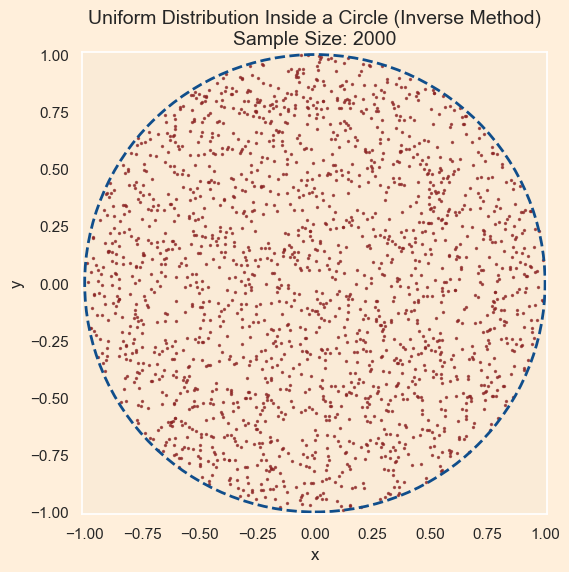

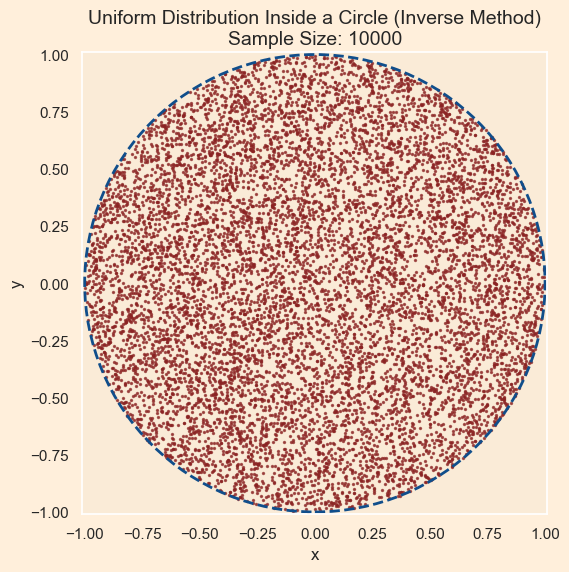

In [10]:
dimensions=[2000,10000]

for i in dimensions:
    
    (x_c,y_c)=generate_uniform_circle_points_c(num_points=i)
    
    plot_uniform_circle(x_c,y_c,title='Uniform Distribution Inside a Circle (Inverse Method)')

### Point d

As said before the method used in point 'b' generates point that are not uniformely distant from the center. 

In point 'c', we utilize the inverse method to generate 'r' in such a manner that it adheres to a uniform distribution. This is accomplished by applying the transformation $r^2 = u$, where 'u' represents a random variable obtained from a uniform distribution spanning the interval $[0,1]$. Consequently, $x^2+y^2=r^2$ becomes uniformly distributed within the range $[0,1]$. As an example, we have 

   $$\mathbb{P}\{(x,y)\in A\}=\mathbb{P}\{x^2+y^2\leq 1/4\}=\mathbb{P}\{r\leq 1/2\}=F(1/2)=(1/2)^2=1$$



To summarize, the approach employed in point 'c' rectifies the non-uniform distribution of distances observed in point 'b' by applying a square root to the distance 'r'.

---
---
---
---
## Exercise 2

---
---
### Point a

Let be $f(x)=C\dot x^{-\frac{3}{2}}$ the PDF of a random variable, such that $x\in[1,\infty)$. By imposing that $f$ is a probability density function:

$$1=\int^\infty_1 f(x)dx=\left.-\frac{2C}{\sqrt{x}}\right|_0^\infty=2C\text{,}$$

so we get $C=\frac{1}{2}$. By computing the primitive function(supposing $x\geq1$), we get the CDF, $F$:

$$F(x)=\int_1^x f(\omega) d\omega=1-\frac{1}{\sqrt{x}}\text{.}$$

So we have that $x=F^{-1}(y)=(1-y)^{-2}$ with $y\in[0,1)$(note that inverse of $F$ is not defined when $y=1$). Below You'll find the sampling.

Now suppose that $y\in [0,A)$ and we want to solve:

$$F(x)=y/A\text{,}$$

and by reasoning as before we easly get:
    
$$x=F^{-1}(y/A)=(1-y/A)^{-2}\text{.}$$


**Implementation and solution**

In the following function, you will find a straightforward yet versatile implementation that can be applied to both cases depicted in point 'a'. This function, when provided with the desired number of points to generate, automatically proceeds to generate random values, denoted as 'y,' sampled from a uniform distribution within the range $[0, A)$. Subsequently, it applies the inverse transformation, specifically $(1-y/A)^{-2}$, to obtain the final set of values.

In [11]:
def power_law_distribution_inverse_method(num_points=1000,A=1,B=1):
    """
    Generate points with a uniform distribution inside a circle using polar coordinates.

    Args:
        num_points (int, optional): Number of points to generate. Default is 1000.
        A (float, optional): Scaling factor. Defauli is 1.
        B (folat, optional): y \in [0,B)

    Returns:
        Array: NumPy arrays containing the power-law distribution.
    """
    
    if B>A:
        print('Inverse distribution not definited.')
        return None
    
    y=np.random.uniform(0,B,num_points)
    
    #Compute x
    x=(1-y/A)**(2)
    x=np.ones(len(x))/x
    
    return x

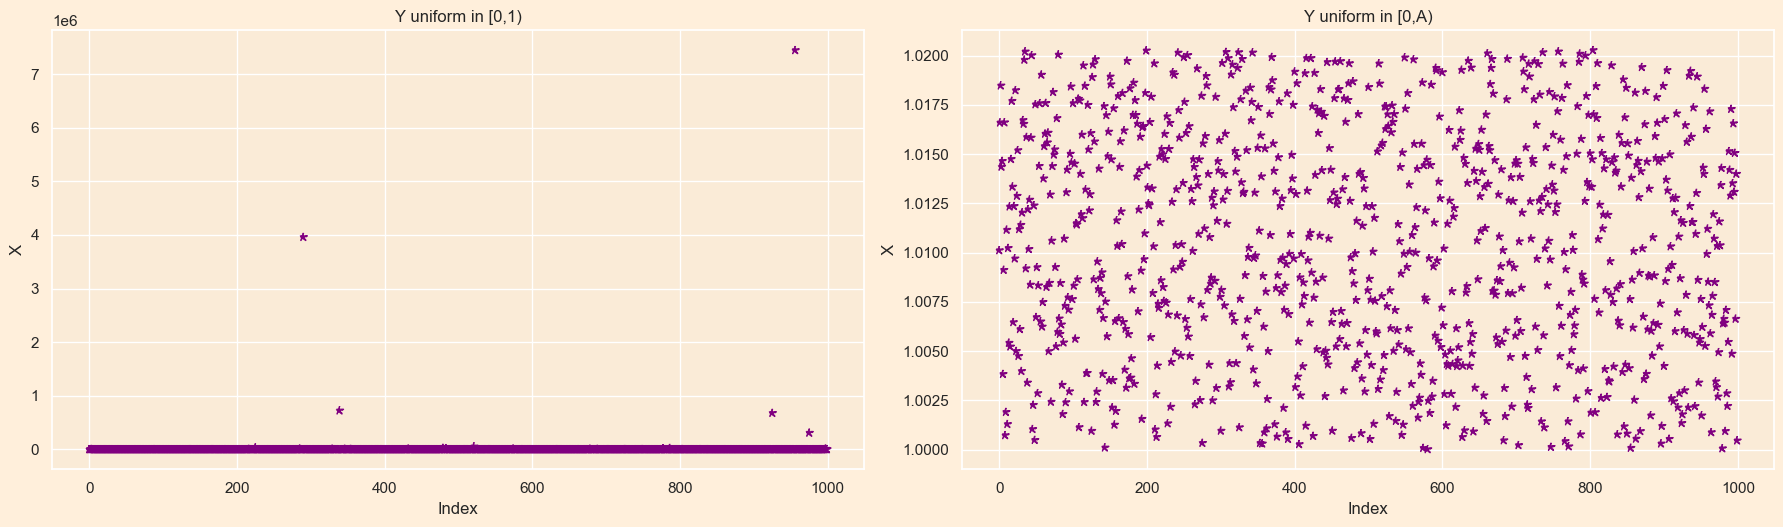

In [12]:
#this is just a simple test for y U(0,1), and y U(0,1)

x_test_1=power_law_distribution_inverse_method()

x_test_2=power_law_distribution_inverse_method(A=100)

#I'll make just a scatterplot

plt.figure(figsize=(18, 10))

# test 1
plt.subplot(223)
plt.scatter(np.arange(len(x_test_1)), x_test_1, linestyle='--',color='purple',marker='*')
plt.xlabel("Index")
plt.ylabel("X")
plt.grid(True)
plt.title("Y uniform in [0,1)")

# Log-binned plot in log scale
plt.subplot(224)
plt.scatter(np.arange(len(x_test_2)), x_test_2, linestyle='--',color='purple',marker='*')
plt.xlabel("Index")
plt.ylabel("X")
plt.grid(True)
plt.title("Y uniform in [0,A)")

plt.tight_layout()
plt.show()

**Note** that it is a simple scatter-plot, if you want to see some simulation, see 'Extra' part.

---
---
### Point b

In [13]:
#The following function allow us to make code more concise: it make the required plots.

def plot_original_histogram_linear_binning(x, num_bins=30, scaling1=None, scaling2=None):
    """
    Plots histograms of a power-law distribution using linear binning in linear and log scales with different scalings.

    Args:
        x (array-like): The data to plot.
        num_bins (int, optional): The number of bins for histograms. Default is 30.
        scaling1 (float, optional): Scaling factor for the custom line in the first plot.
        scaling2 (float, optional): Scaling factor for the custom line in the second plot.

    Returns:
        None
    """
    plt.figure(figsize=(18, 10))

    suptitle_text = (
        f"Histograms of Original Data\n"
        f"Linear Binning in Linear and Log Scales with Different Scalings\nSample size: {len(x)}"
    )

    plt.suptitle(suptitle_text, fontsize=16)
    
    line_x = np.linspace(0.01, len(x), num=1000)
    line_y = line_x**(-3/2)
    
    # Calculate the normalization factors for the lines to fit the histograms
    hist, bins = np.histogram(x, bins=num_bins, density=True)
    
    if scaling1 is None:
        hist_max = np.max(hist)
        line_max = np.max(line_y)
        scaling1 = hist_max / line_max
        
    if scaling2 is None:
        hist_max = np.max(hist)
        line_max = np.max(line_y)
        scaling2 = hist_max / line_max
        
    # Linear-binned plot in linear scale
    plt.subplot(121)
    plt.hist(x, bins=num_bins, density=True, alpha=0.4, color='blue', label="Linear Binning in Linear Scale")
    plt.plot(line_x, line_y * scaling1, linestyle='--', color='purple', label=f"Custom Line (Scale: {scaling1})", linewidth=3)
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.ylim(0, 0.1)
    plt.xlim(0, 100)
    plt.legend()
    plt.grid(True)
    plt.title("Linear Binning in Linear Scale")

    # Linear-binned plot in log scale
    plt.subplot(122)
    line_x_log = np.linspace(0.01, len(x), num=1000)
    plt.hist(x, bins=num_bins, density=True, alpha=0.4, color='blue', label="Linear Binning in Log Scale")
    plt.loglog(line_x_log,line_y * scaling2, linestyle='--', color='purple', label=f"Custom Line (Scale: {scaling2:1.3f})")
    plt.xlabel("log(x)")
    plt.ylabel("log(Density)")
    plt.xscale("log")
    plt.xlim(1, 1000)
    plt.legend()
    plt.grid(True)
    plt.title("Linear Binning in Log Scale")

    plt.tight_layout()
    plt.show()

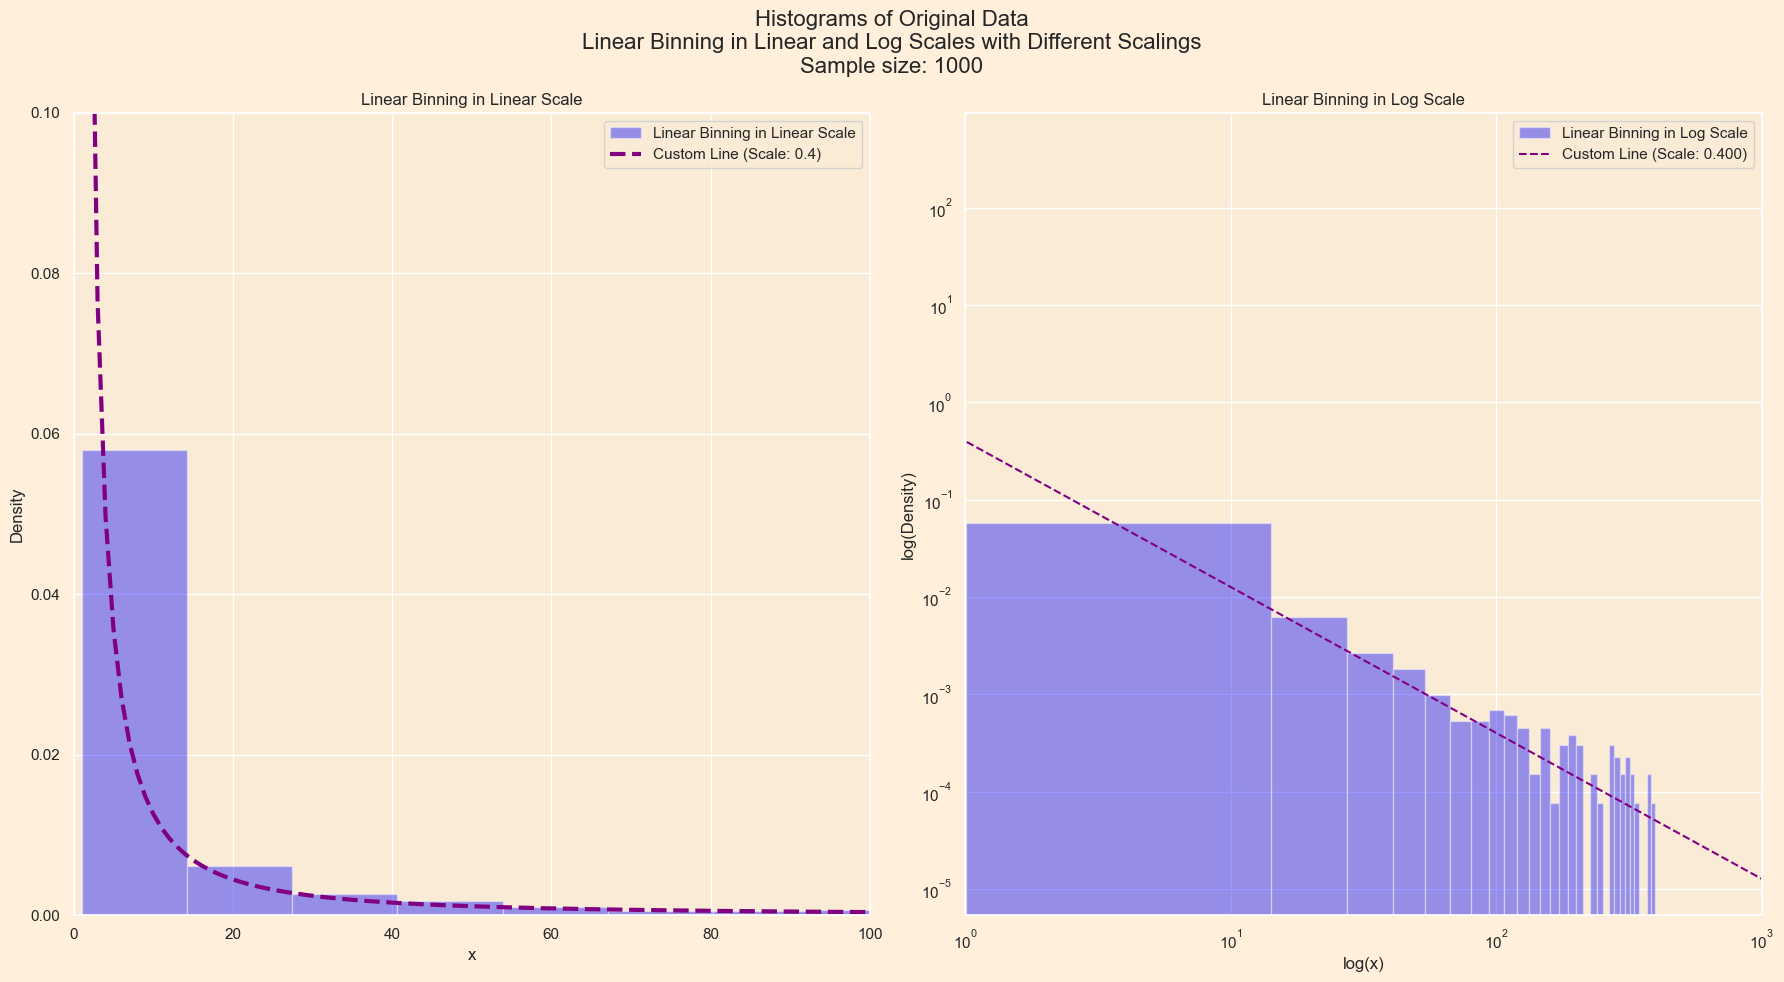

In [14]:
A=200000
B=190000
num_points=1000

#apply transformation
x = power_law_distribution_inverse_method(num_points=num_points,A=A,B=B)

plot_original_histogram_linear_binning(x,scaling1=0.4,scaling2=0.4)

---
---
### Point c

In [15]:
#similarly I've defined a function that makes the plot automatically

def plot_midpoints_linear_binned(x, start=None, stop=None, num_bins=30, scaling=None):
    """
    Plots histograms of a power-law distribution using different binning methods and scales.
    
    Args: as the previous one
    """
    if start is None:
        start = np.min(x)
    if stop is None:
        stop = np.max(x)
    
    plt.figure(figsize=(18, 10))
    
    # Calculate the y-values for the line 𝒙^{-3/2}
    line_x = np.linspace(start, stop, num=1000)
    line_y = line_x**(-3/2)

    # Linear-binned plot in linear scale
    bins = np.linspace(start=start, stop=stop, num=num_bins)
    y, edges = np.histogram(x, bins, density=True)
    centers = 0.5 * (edges[1:] + edges[:-1])
    
    if scaling==None:
        scaling=np.max(y)/np.max(line_y)
    
    plt.plot(centers, y, marker='o', label="Distribution",markersize=5,color='blue')
    plt.plot(line_x, line_y*scaling, linestyle='--', label="x^{-3/2} Line",color='purple',linewidth=3,alpha=0.7)
    plt.legend()
    plt.title("Power-Law Distribution Midpoints\n"
        f"Linear Binning and Linear Scale\n Sample size: {len(x)}",fontsize=16)

    plt.tight_layout()
    plt.show()

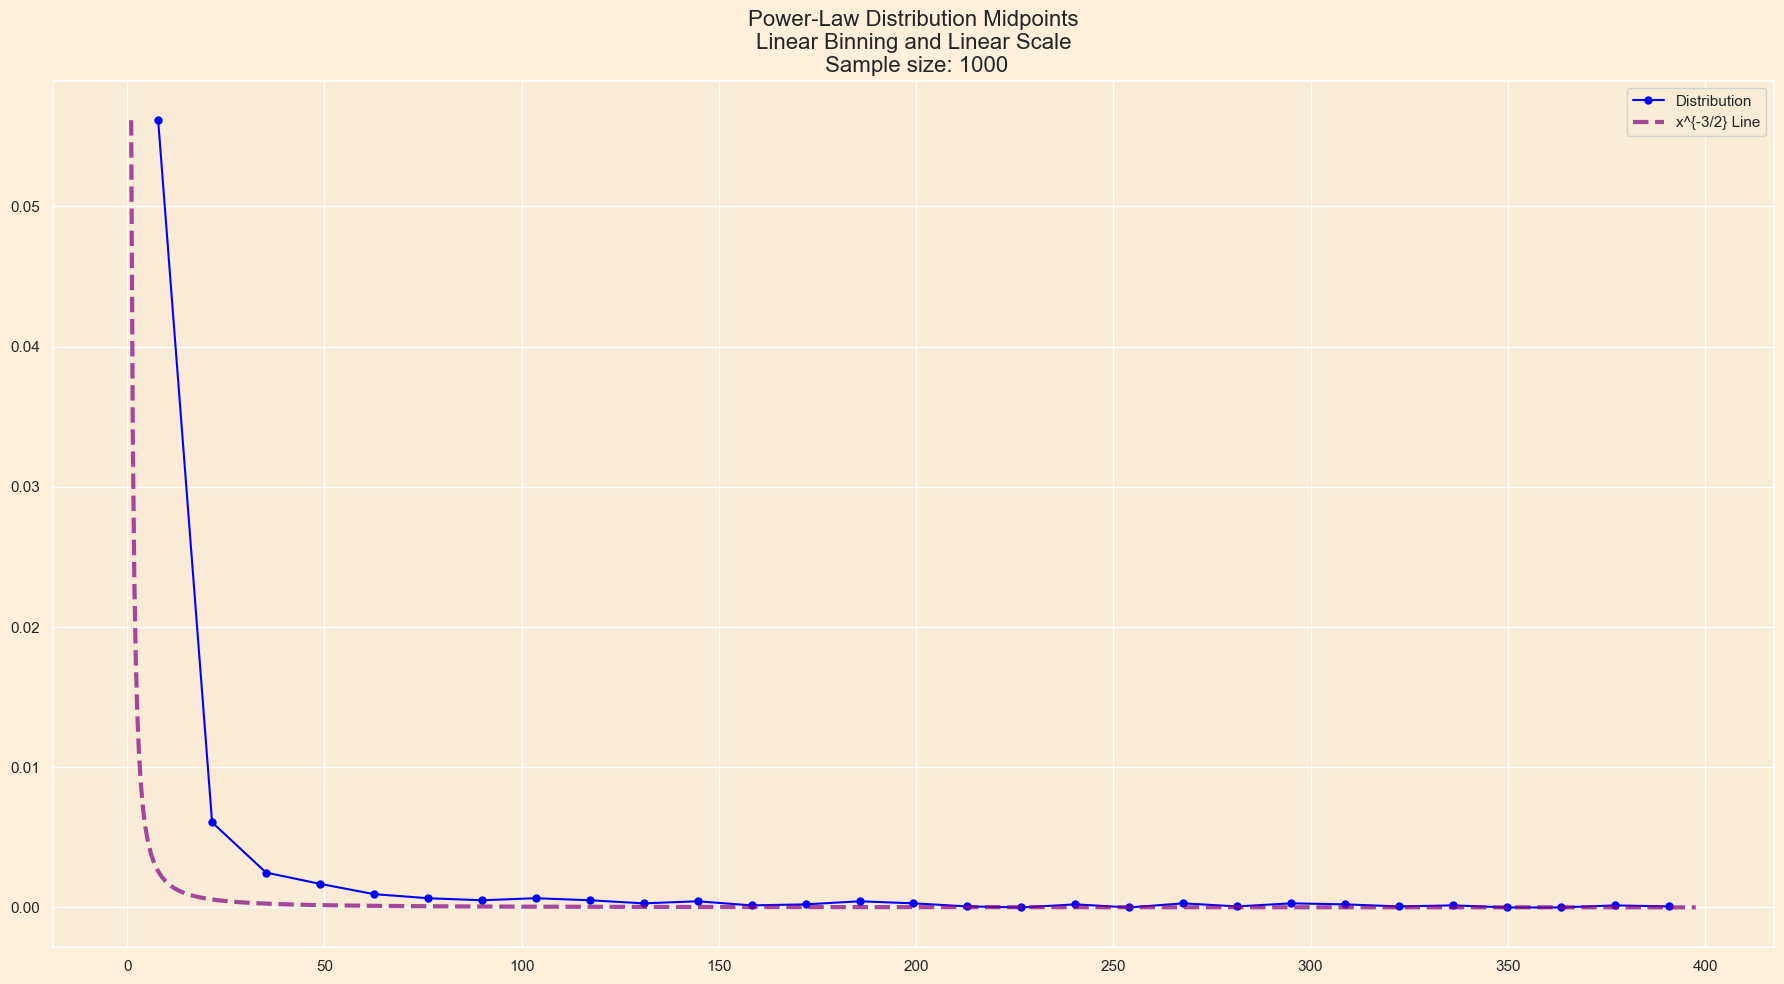

In [16]:
plot_midpoints_linear_binned(x)

---
---
### Point d


In [17]:
def plot_midpoints_log_binned(x, start=None, stop=None, num_bins=30,scaling=None):
    """
    Similar to previous function
    """
    
    if start is None:
        start = np.min(x)
    if stop is None:
        stop = np.max(x)

    # Create two rows of two subplots each
    plt.figure(figsize=(18, 10))


    # Calculate the y-values for the line 𝒙^{-3/2}
    line_x = np.linspace(start, stop, num=1000)
    line_y = line_x**(-3/2)

    
    # Log-binned plot in linear scale
    bins = np.logspace(start=np.log10(start), stop=np.log10(stop), num=num_bins)
    y, edges = np.histogram(x, bins, density=True)
    centers = 0.5 * (edges[1:] + edges[:-1])

    # Calculate the y-values for a custom line in log-log scale for this subplot
    line_y_loglog = 10**(np.log10(line_x) * (-3/2)) * 0.5  # Adjust the coefficient (0.5 in this example)
    
    if scaling==None:
        scaling=np.max(y)/np.max(line_y)
    # Log-binned plot in log-log scale
    plt.loglog(centers, y, marker='o',label="Distribution",markersize=5,color='blue')
    plt.loglog(line_x, line_y*scaling, linestyle='--', label="x^{-3/2} Line",linewidth=3,color='purple',alpha=0.7)
    plt.legend()
    plt.xlim(1, 1000)
    plt.title("Power-Law Distribution Histograms\n"
        f"Log Binning and Log Scale\nSample size: {len(x)}:",fontsize=16)

    plt.tight_layout()
    plt.show()

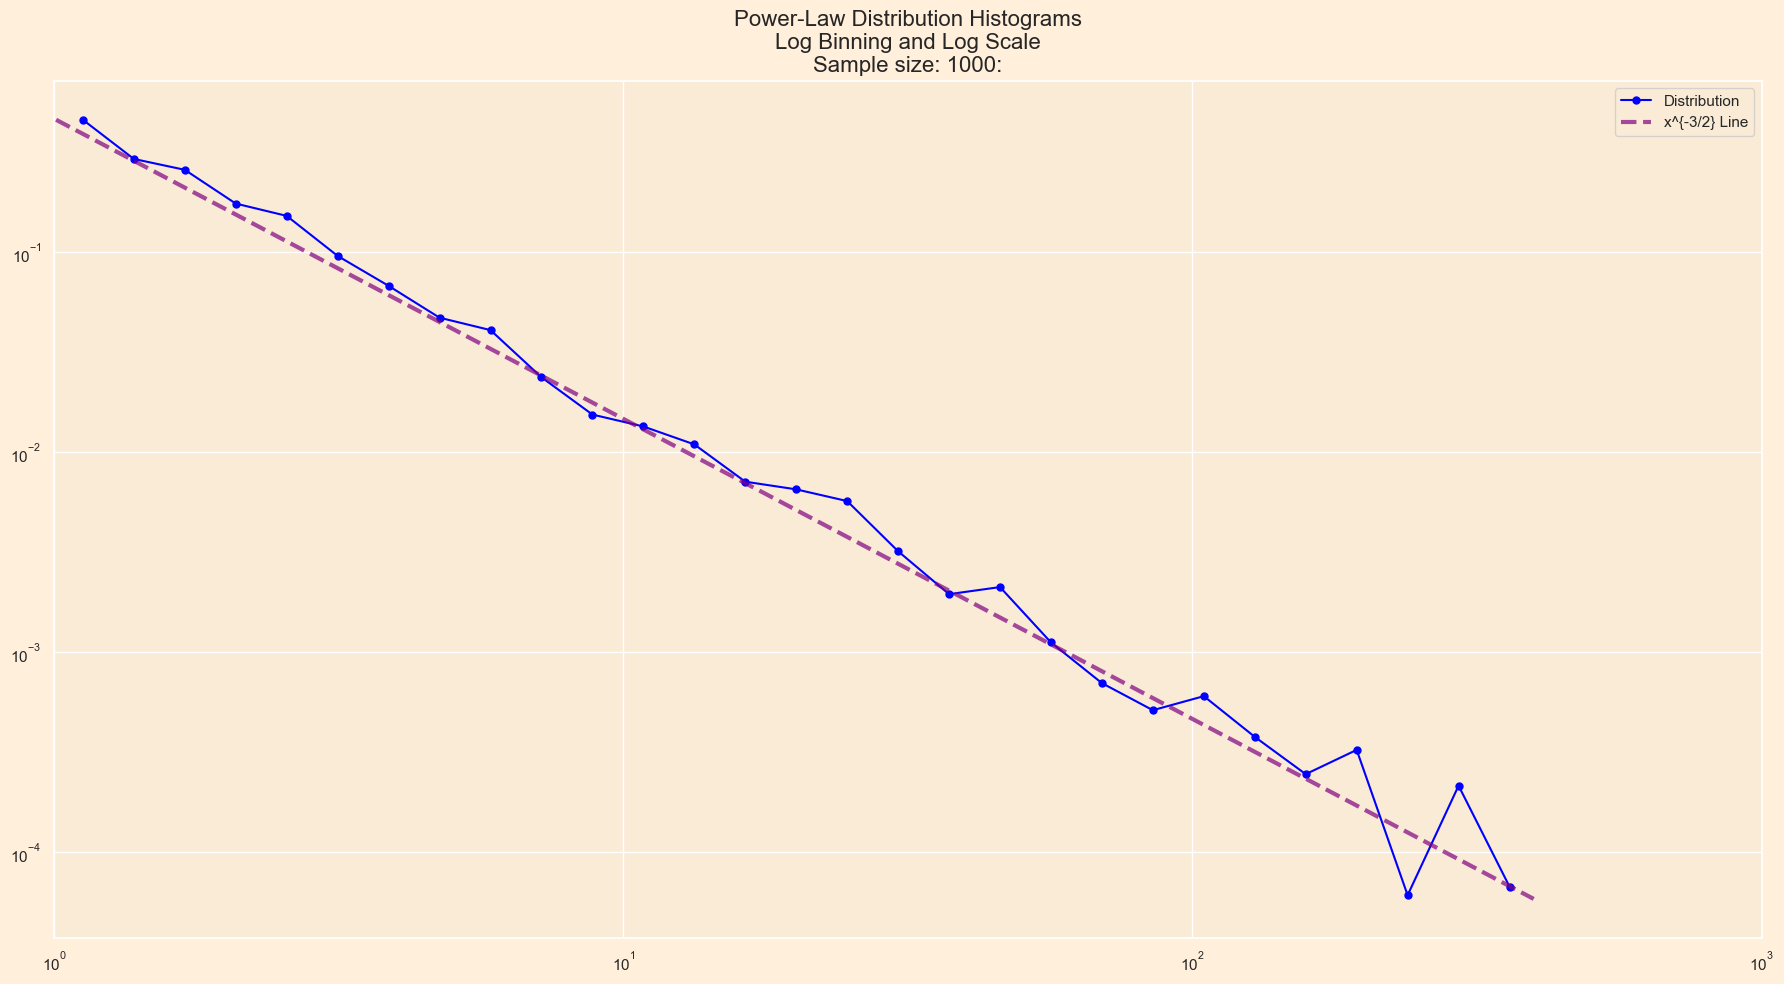

In [18]:
 plot_midpoints_log_binned(x)

---
---
### Point e

In the binned plots in parts c) and d), which utilize logarithmic binning, the advantage of using logarithmic coordinates over linear coordinates is evident.

Logarithmic binning provides a better visualization of the data by spreading out the bins in a way that captures the details of the distribution at both low and high values. In fact, in point 'c,' the data points appear to lie along a line since the range within each bin is the same. As a result, logarithmic binning is especially useful when dealing with data that follows a power-law distribution, characterized by a fat-tailed distribution. Log-binning extends visibility to larger values of x, as observed in the plots. Thanks to log-binning, we can overcome exponential growth; at large values of x, corresponding to very low density, we can 'zoom in' on the distribution.

In contrast, linear binning clusters data points into a small portion of the plot, making it difficult to discern the functional form of the distribution. This makes it challenging to capture the structure of the probability density function (PDF).



Furthermore, for an even more informative presentation, you can observe that plotting log-binned data on a log-log scale is the most effective choice by a comparison to log-binned data in linear escale. In point 'c,' the bins grow exponentially.

---
---
### Point f

(i) The rejection method is generally slower than the inverse distribution method because, at each step, a point is generated within an envelope and can then be accepted or rejected. This issue is particularly noticeable for fat-tailed distributions (such as power-law distributions), where a significant portion of the generated points within the larger envelope may be rejected(since their probability to be accepted becomes lower). This makes the method less efficient compared to the inverse distribution method, which 'directly' generates samples following the probability density function (PDF). In this method, every sample has a probability of 1 of being accepted, as it involves generating a counterpart using a simple-to-simulate uniform distribution. 

(ii) In the context of how realizations $x \in X$ emerge from a natural fragmentation process, the inverse distribution method is more analogous. Natural fragmentation processes often lead to power-law distributions with a heavy tail and exponential cut-off. The inverse distribution method generates samples that follow the pdf directly, which is similar to how realizations in a natural fragmentation process are generated probabilistically. The rejection method, on the other hand, generates points uniformly in a bounding box and then filters them, which is less analogous to the natural emergence of realizations in a fragmentation process.

## Extra part (safely skip!)

this part provides you a better confrontation between different visualization techniques applied. The function are really similar to the one already defined, but just more complete for comparisons.

In [19]:
def plot_histograms(x, start=None, stop=None, num_bins=30):
    """
    Plots histograms of a power-law distribution using different binning methods and scales.

    Args:
        x (array-like): The data to plot.
        start (float, optional): The minimum value for binning. If None, the minimum value in x is used.
        stop (float, optional): The maximum value for binning. If None, the maximum value in x is used.
        num_bins (int, optional): The number of bins for histograms. Default is 30.

    Returns:
        None
    """
    if start is None:
        start = np.min(x)
    if stop is None:
        stop = np.max(x)

    # Create two rows of two subplots each
    plt.figure(figsize=(18, 10))

    # Common large title for all plots with line breaks
    suptitle_text = (
        "Power-Law Distribution Histograms\n"
        f"Different Binning and Scales\nSample size: {len(x)}"
    )

    plt.suptitle(suptitle_text, fontsize=16)

    # Calculate the y-values for the line 𝒙^{-3/2}
    line_x = np.linspace(start, stop, num=1000)
    line_y = line_x**(-3/2)

    # Linear-binned plot in linear scale
    bins = np.linspace(start=start, stop=stop, num=num_bins)
    y, edges = np.histogram(x, bins, density=True)
    centers = 0.5 * (edges[1:] + edges[:-1])

    plt.subplot(221)
    plt.plot(centers, y, marker='o', linestyle='-', color='#104E8B', label="Histogram")
    plt.plot(line_x, line_y*np.max(y)/np.max(line_y), linestyle='--', color='red', label="x^{-3/2} Line")
    plt.legend()
    plt.title("Linear-Binning in Linear Scale")
    
    # Linear-binned plot in log-log scale
    plt.subplot(222)
    plt.loglog(centers, y, marker='o', linestyle='-', color='#104E8B', label="Histogram")
    plt.loglog(line_x, line_y*np.max(y)/np.max(line_y), linestyle='--', color='red', label="Custom Line")
    plt.legend()
    plt.xlim(1, 1000)
    plt.title("Linear-Binning in Log-Log Scale")

    
    
    # Log-binned plot in linear scale
    bins = np.logspace(start=np.log10(start), stop=np.log10(stop), num=num_bins)
    y, edges = np.histogram(x, bins, density=True)
    centers = 0.5 * (edges[1:] + edges[:-1])

    plt.subplot(223)
    plt.plot(centers, y, marker='o', linestyle='-', color='#104E8B', label="Histogram")
    plt.plot(line_x, line_y*np.max(y)/np.max(line_y), linestyle='--', color='red', label="x^{-3/2} Line")
    plt.legend()
    plt.title("Log-Binning in Linear Scale")

    # Calculate the y-values for a custom line in log-log scale for this subplot
    line_y_loglog = 10**(np.log10(line_x) * (-3/2)) * 0.5  # Adjust the coefficient (0.5 in this example)
    
    # Log-binned plot in log-log scale
    plt.subplot(224)
    plt.loglog(centers, y, marker='o', linestyle='-', color='#104E8B', label="Histogram")
    plt.loglog(line_x, line_y*np.max(y)/np.max(line_y), linestyle='--', color='red', label="Custom Line")
    plt.legend()
    plt.xlim(1, 1000)
    plt.title("Log-Binning in Log-Log Scale")

    plt.tight_layout()
    plt.show()
    
    

    
def plot_original_histogram(x, num_bins=30):
    """
    Plots the histogram of the original data using both linear and log binning in linear and log scales.
    """
    # Create two rows of two subplots each
    plt.figure(figsize=(18, 10))

    # Common large title for all plots with line breaks
    suptitle_text = (
        f"Histograms of Original Data\n"
        f"Different Binning and Scales\nSample size: {len(x)}"
    )

    plt.suptitle(suptitle_text, fontsize=16)
    
    line_x = np.linspace(0.01, len(x), num=1000)
    line_y = line_x**(-3/2)
    
    # Calculate the normalization factor for the line to fit the histogram
    hist, bins = np.histogram(x, bins=num_bins, density=True)
    hist_max = np.max(hist)
    line_max = np.max(line_y)
    line_scaling = hist_max / line_max
    
    # Linear-binned plot in linear scale
    plt.subplot(221)
    plt.hist(x, bins=num_bins, density=True, alpha=0.5, color='blue', label="Linear Binning in Linear Scale",linewidth=5)
    plt.plot(line_x, line_y * line_scaling, linestyle='--', color='purple', label="Custom Line")
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.title("Linear Binning in Linear Scale")

    # Linear-binned plot in log scale
    plt.subplot(222)
    plt.hist(x, bins=num_bins, density=True, alpha=0.5, color='blue', label="Linear Binning in Log Scale")
    plt.loglog(line_x, line_y * line_scaling, linestyle='--', color='purple', label="Custom Line")
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.xscale("log")
    plt.legend()
    plt.grid(True)
    plt.title("Linear Binning in Log Scale")

    # Log-binned plot in linear scale
    plt.subplot(223)
    plt.hist(x, bins=np.logspace(np.log10(min(x)), np.log10(max(x)), num=num_bins), density=True, alpha=0.5, color='blue', label="Log Binning in Linear Scale")
    plt.plot(line_x, line_y * line_scaling, linestyle='--', color='purple', label="Custom Line")
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.title("Log Binning in Linear Scale")

    # Log-binned plot in log scale
    plt.subplot(224)
    plt.hist(x, bins=np.logspace(np.log10(min(x)), np.log10(max(x)), num=num_bins), density=True, alpha=0.5, color='blue', label="Log Binning in Log Scale")
    plt.plot(line_x, line_y * line_scaling, linestyle='--', color='purple', label="Custom Line")
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.xscale("log")
    plt.legend()
    plt.grid(True)
    plt.title("Log Binning in Log Scale")

    plt.tight_layout()
    plt.show()

When y is in [0,1)


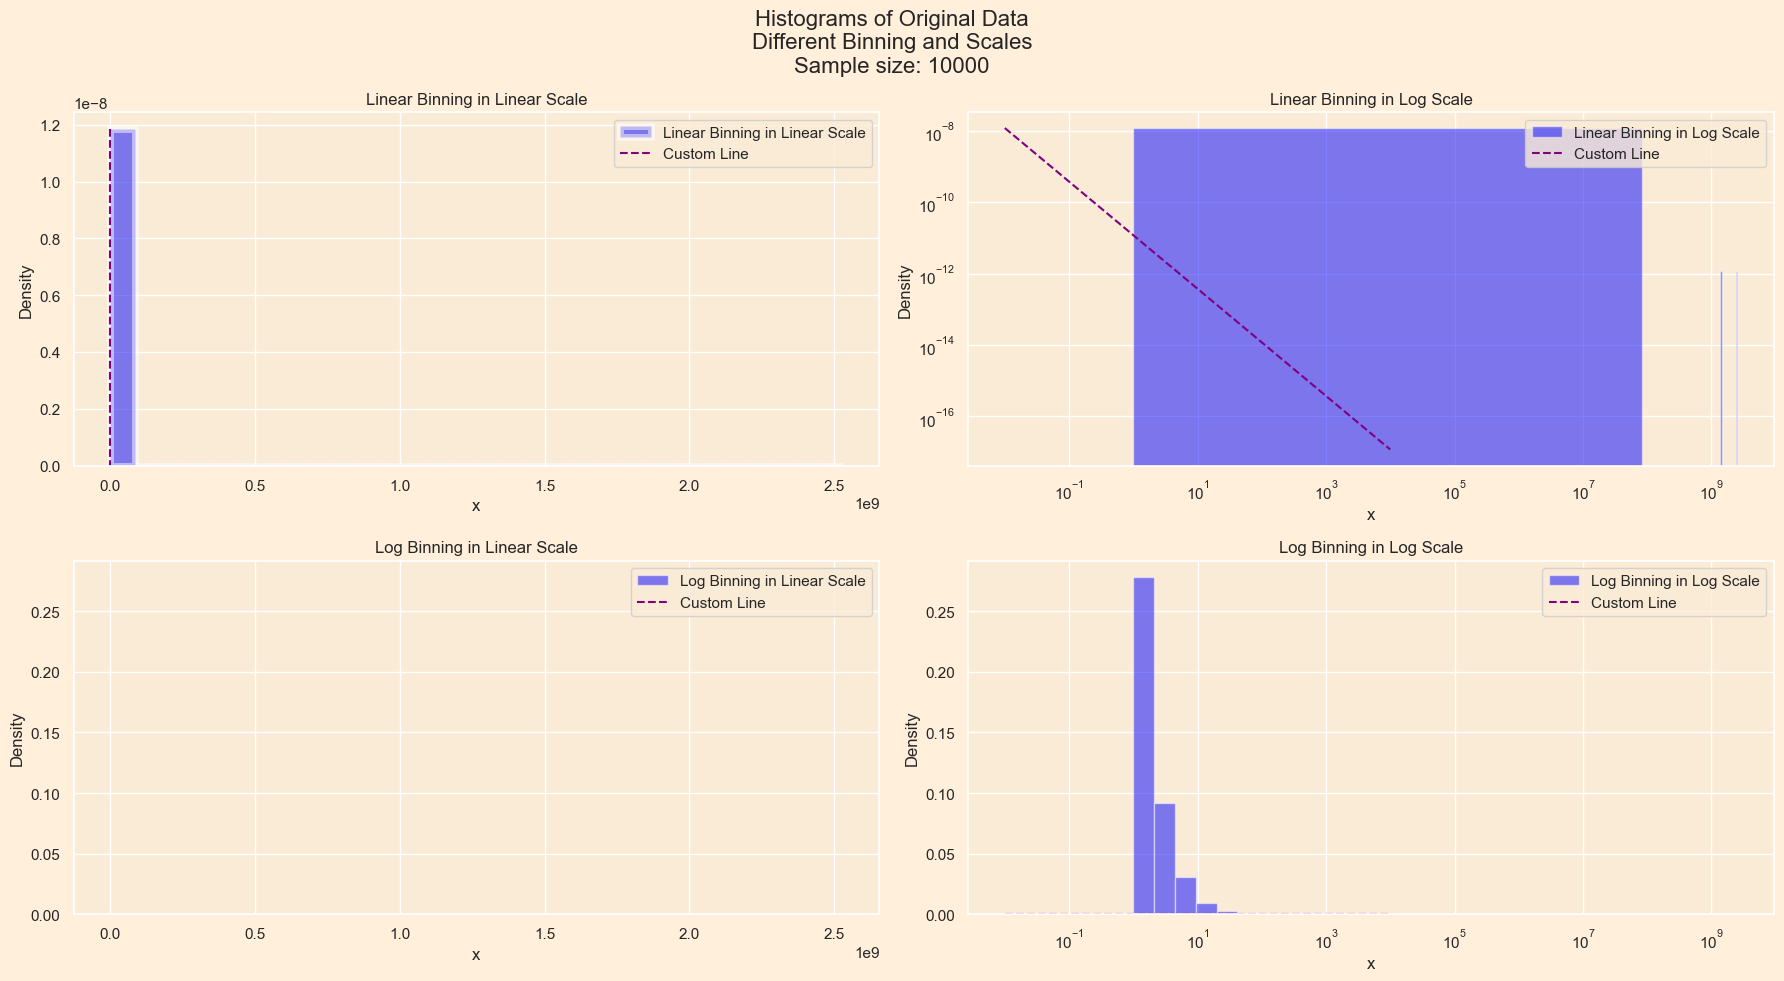

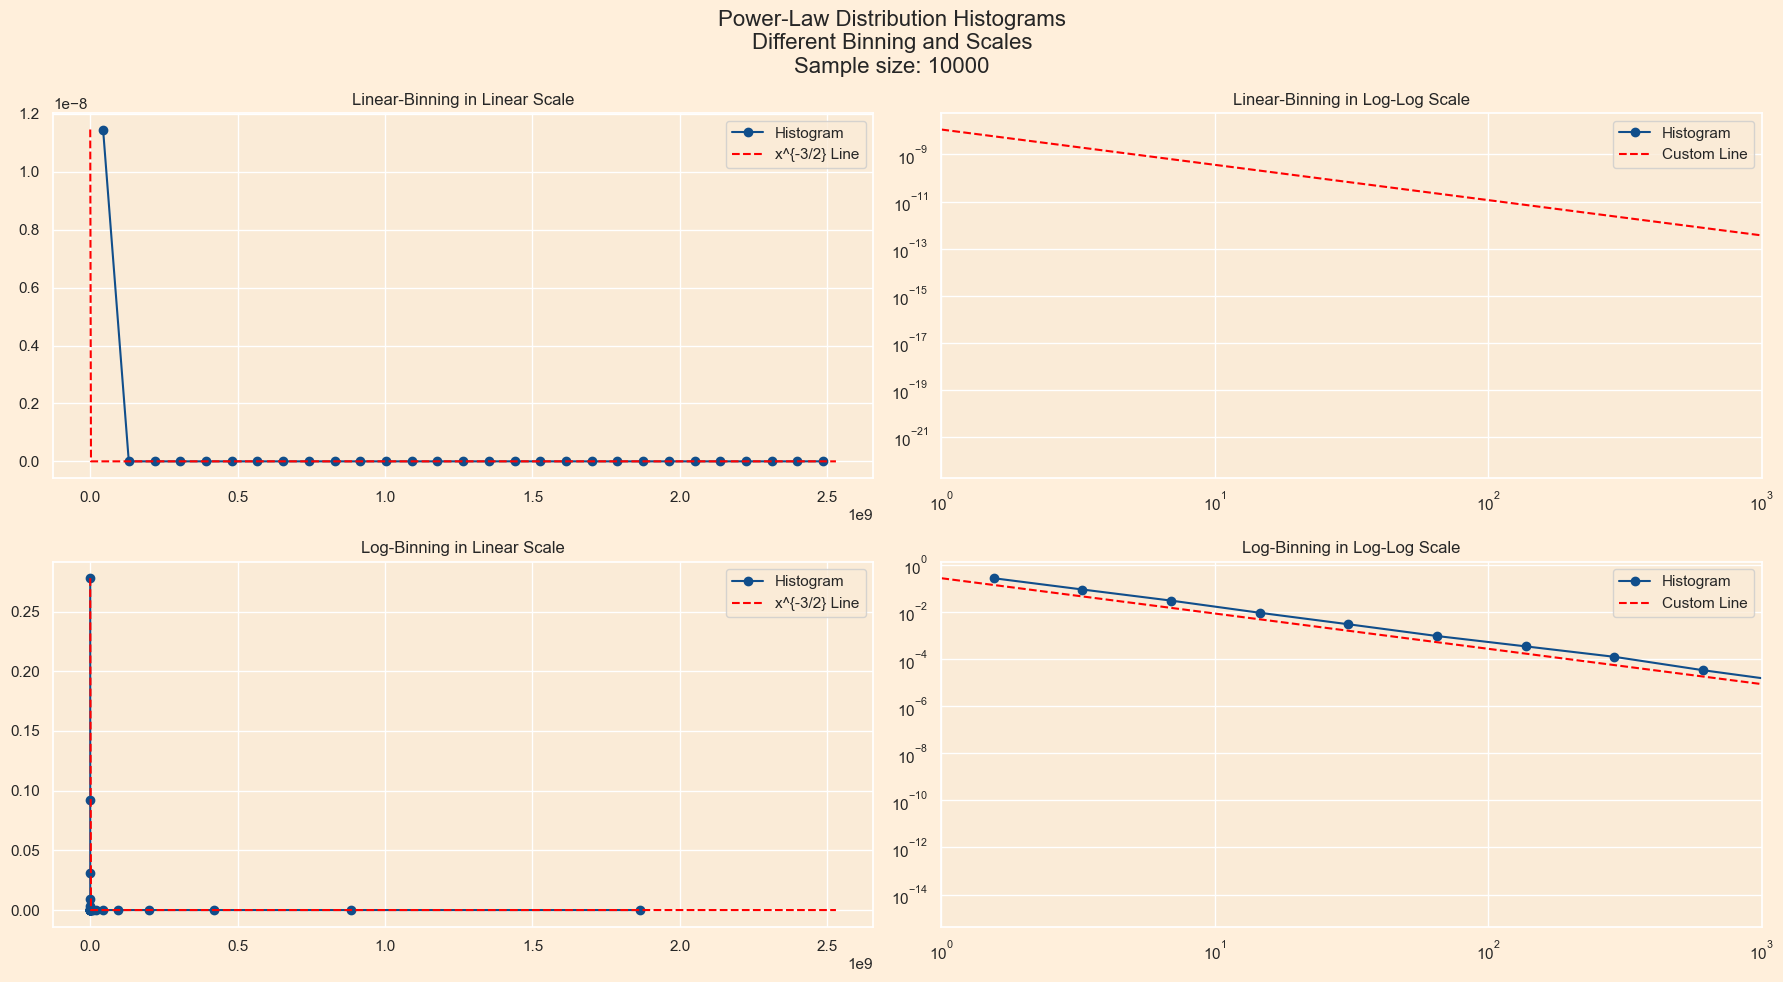

In [20]:
#simulate simply power low, I'll pick more points then the one of exercises

print('When y is in [0,1)')

x_test=power_law_distribution_inverse_method(num_points=10000)

plot_original_histogram(x_test)

plot_histograms(x_test)

When y is in [0,A)


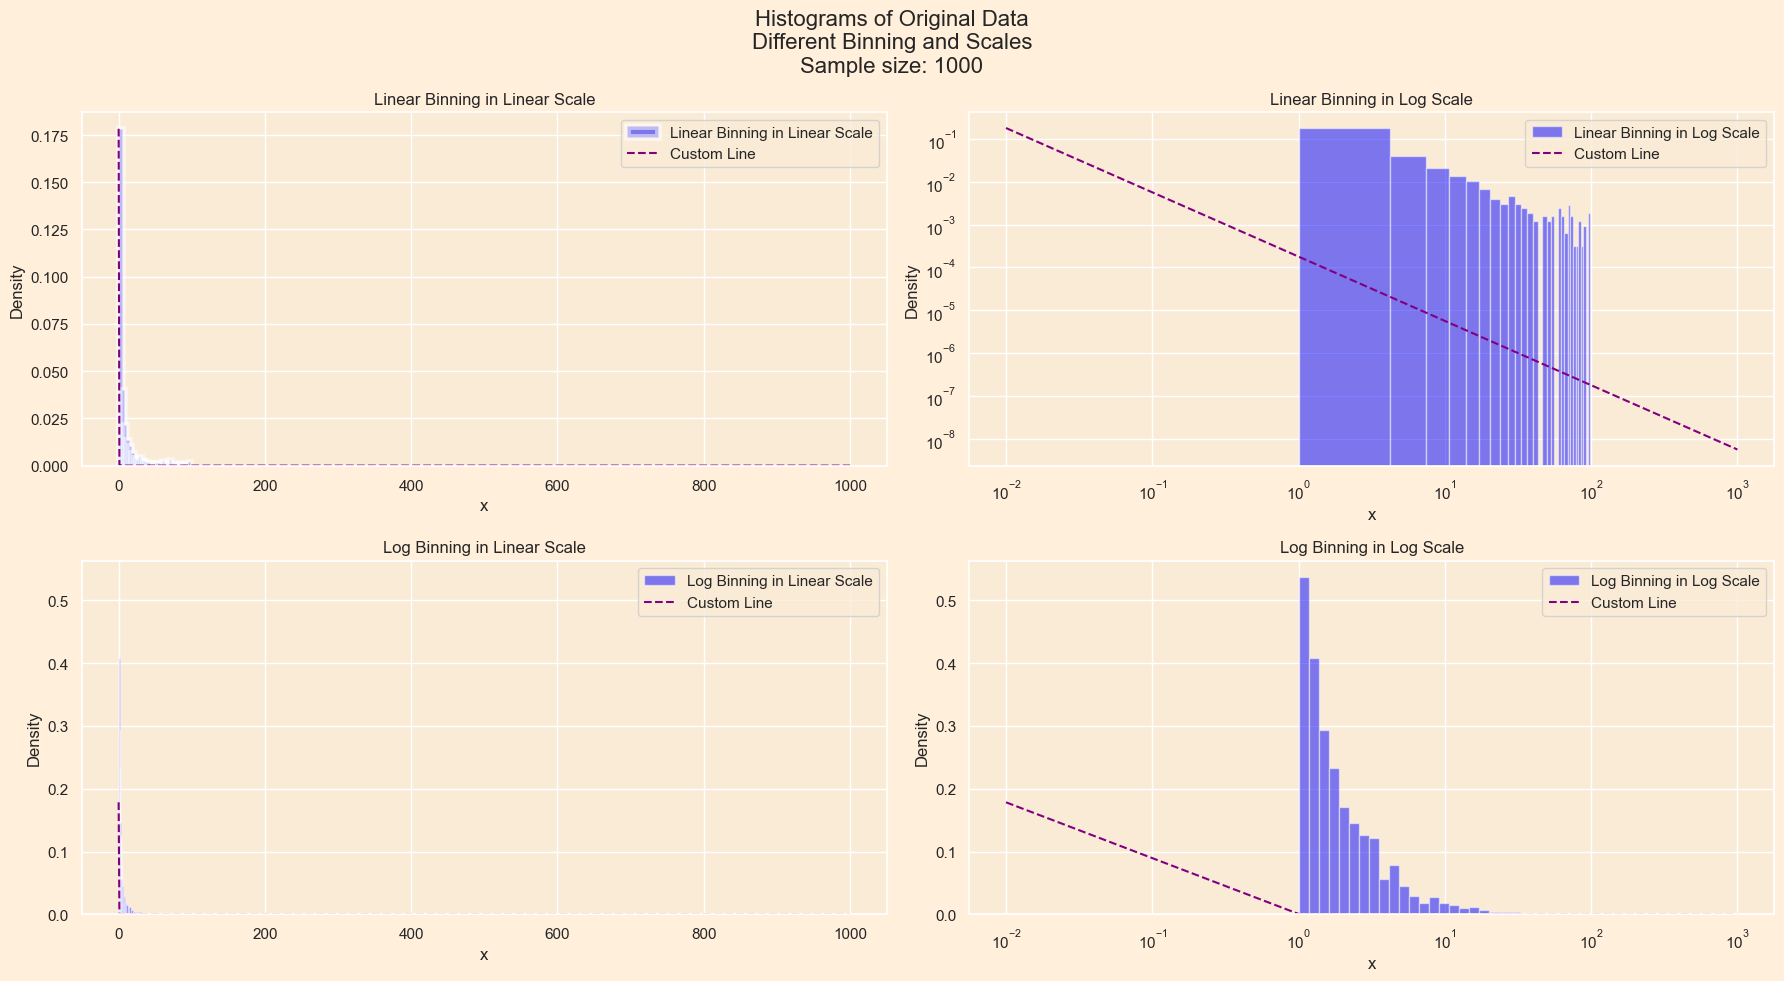

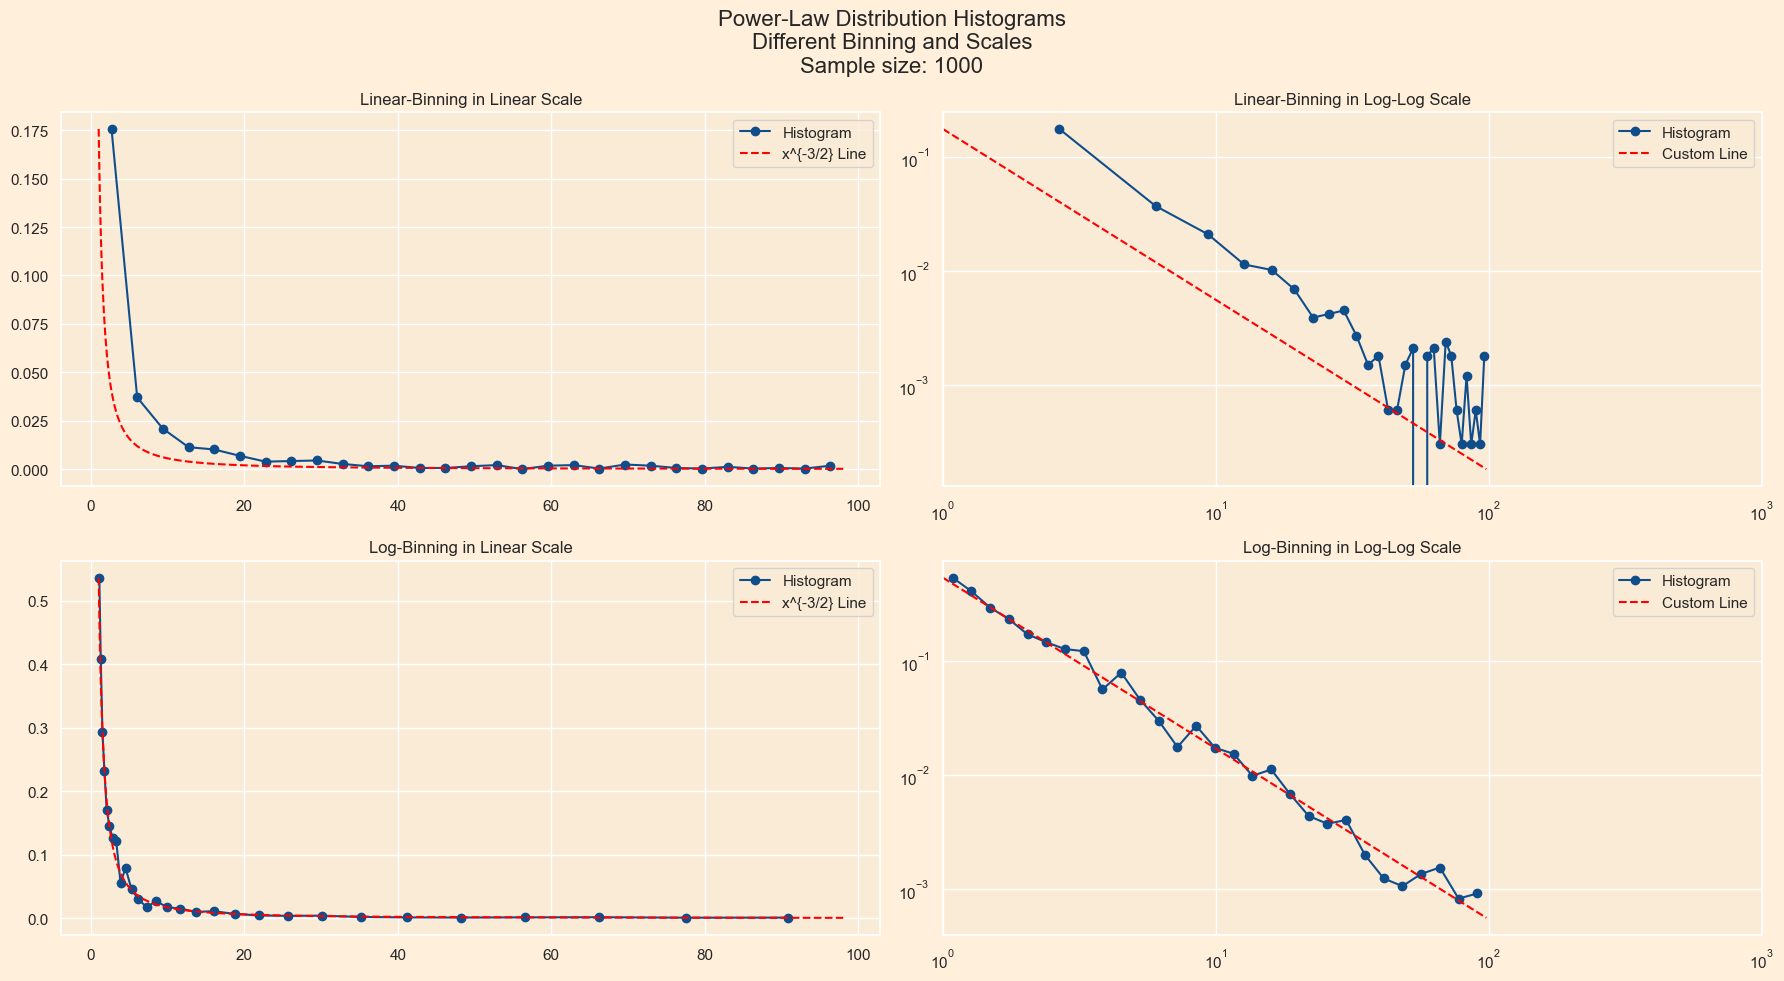

In [21]:
print('When y is in [0,A)')

x_test=power_law_distribution_inverse_method(num_points=1000, A=20000, B=18000)#if you want change values and see what happens

plot_original_histogram(x_test)

plot_histograms(x_test)

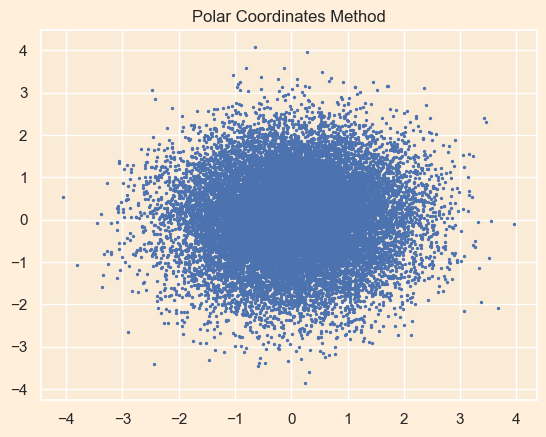

In [4]:
# Generate random values for r and theta
num_points=20000
u_values=np.random.uniform(0,1, num_points)
theta_values=np.random.uniform(0,2*np.pi, num_points)
# Calculate (x, y) using polar coordinates
x_values_polar=np.sqrt(-2*np.log(u_values))*np.cos(2*np.pi*theta_values)
y_values_polar=np.sqrt(-2*np.log(u_values))*np.sin(2*np.pi*theta_values)
# Plot the points using the Polar Coordinates Methodplt.figure(figsize=(5,5))
plt.scatter(x_values_polar, y_values_polar, s=2)
plt.title('Polar Coordinates Method')
plt.show()